In [1]:
#import hmf
from utils import ParamsFile, HaloReader
import numpy as np
import matplotlib.pyplot as plt

import m3p_merger

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rc('font', size=15)

In [2]:
# Peak patch data
pathPrefix = "/usr/users/ellis/PeakPatch/m3p/axOut/"

# Unevolved Density fields
DensPath = "/usr/users/ellis/bin/InputFiles/512"
DensSuffix = ['/L6N3_07/axion.m.00115_L6N3_07','/L6N3_06/axion.m.00115_L6N3_06','/L6N3_01/axion.m.00115_L6N3_01']

# Cosmological parameters
z_eq = 3402
a_eq = 1/(z_eq+1)
rhoc = 2.78e-07*(1e6)**3 #Msol/cMpc^3
rho_bg = 0.267*rhoc #DM mean density Msol/cMpc^3

ma = 1e-4

Loading file: /usr/users/ellis/PeakPatch/m3p/axOut/L6N3_07_comp_final_halos_0.hdf5
Loading file: /usr/users/ellis/PeakPatch/m3p/axOut/L6N3_07_comp_final_halos_1.hdf5
Loading file: /usr/users/ellis/PeakPatch/m3p/axOut/L6N3_07_comp_final_halos_2.hdf5
Loading file: /usr/users/ellis/PeakPatch/m3p/axOut/L6N3_07_comp_final_halos_3.hdf5
Loading file: /usr/users/ellis/PeakPatch/m3p/axOut/L6N3_07_comp_final_halos_4.hdf5
Loading file: /usr/users/ellis/PeakPatch/m3p/axOut/L6N3_07_comp_final_halos_5.hdf5
zi = 0: 3009 new peaks.
zi = 1: 17208 new peaks.
zi = 2: 2435 new peaks.
zi = 3: 354 new peaks.
zi = 4: 56 new peaks.
(4, 23127) (4, 65)
0.0 % less than zero


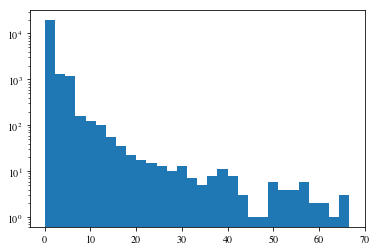

0.0 % less than zero


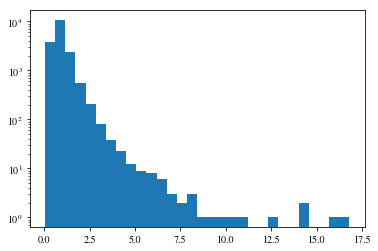

In [3]:
ppFile = pathPrefix + "../inputs/inputs.ax1"
ppFile_more = pathPrefix + "../inputs/inputs.ax_manyz"
densFile = DensPath+DensSuffix[0]

all_peaks = m3p_merger.FindAllSubHalos(ppFile, printOutput=True)
redshifts, deltaspec = m3p_merger.FindDeltaSpectrum(all_peaks, densFile, ppFile)

# Get Final peaks for comparison
peak_list, boxsize = m3p_merger.MakePeakList(ppFile)
final_peaks = peak_list[0]
redshifts_final, deltaspec_final = m3p_merger.FindDeltaSpectrum(final_peaks, densFile, ppFile)

#print("-------------With more redshifts-------------")
#all_peaks_more = pp_merger.FindAllSubHalos(ppFile_more, printOutput=False)
#redshifts_more, deltaspec_more = pp_merger.FindDeltaSpectrum(all_peaks_more, densFile, ppFile_more)

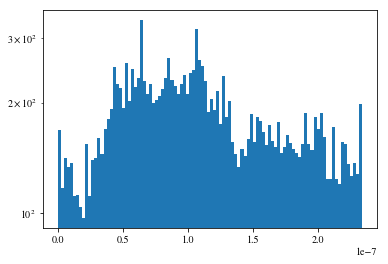

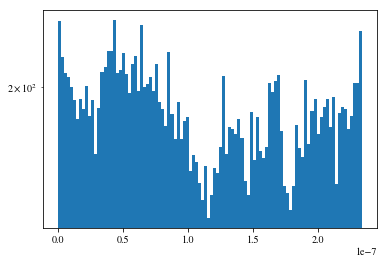

In [4]:
plt.hist(final_peaks[0],log=True,bins=100);
plt.show()
plt.hist(final_peaks[1],log=True,bins=100);

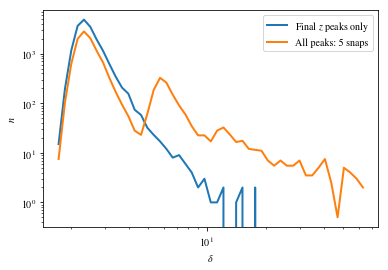

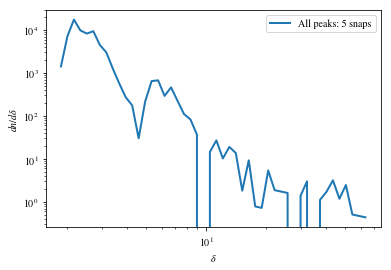

In [5]:
bins = np.logspace(np.log10(min(deltaspec)), np.log10(max(deltaspec)),50)
n, bins = np.histogram(deltaspec, bins = bins)
n2, bins = np.histogram(deltaspec_final, bins = bins)
#n3, bins = np.histogram(deltaspec_more, bins = bins)

fig = plt.figure()

plt.loglog(bins[:-1], n2, lw=2, label="Final $z$ peaks only")
plt.loglog(bins[:-1], n/2, lw=2, label="All peaks: 5 snaps")
#plt.loglog(bins[:-1], n3, lw=2, label="All peaks: 100 snaps")

plt.ylabel(r"$n$")
plt.xlabel(r"$\delta$")
plt.legend()
plt.show()

dn = abs(np.diff(n)/np.diff(bins[:-1]))
#dn2 = abs(np.diff(n2)/np.diff(bins[:-1]))
#dn3 = abs(np.diff(n3)/np.diff(bins[:-1]))

#plt.loglog(bins[1:-1], dn2, lw=2, label="Final $z$ peaks only")
plt.loglog(bins[1:-1], dn, lw=2, label="All peaks: 5 snaps")
#plt.loglog(bins[1:-1], dn3, lw=2, label="All peaks: 100 snaps")
plt.ylabel(r"$dn/d\delta$")
plt.xlabel(r"$\delta$")
plt.legend()
plt.show()

#dV = (boxsize/512)**3


#plt.hist(deltaspec, log=True ,bins = bins);
#plt.hist(deltaspec_final, log=True,bins = bins);

In [6]:
bins = np.linspace(0, 10, 100)
n, bins = np.histogram(deltaspec, bins = bins)
n2, bins = np.histogram(deltaspec_final, bins = bins)
#n3, bins = np.histogram(deltaspec_more, bins = bins)

F = (np.sum((bins[:-1]+1)*n) - np.cumsum((bins[:-1]+1)*n))/np.sum((bins[:-1]+1)*n)
F2 = (np.sum((bins[:-1]+1)*n2) - np.cumsum((bins[:-1]+1)*n2))/np.sum((bins[:-1]+1)*n2)

print(n-n2)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   2  11  35 112 234 371 467 352 289 192 138  98  73  22  23   5  -2  -3
 -11   0 -16 -17 -17 -11  -1  -9 -10  -3  -9  -7   9  11   9  38  49  59
  88  92 116 127 157 132 158 126 122 117  93  83  72  53  59  60  41  45
  25  36  26  34  23  12  23  24  20  19  16   8   9  13  10   6  11   8
  10   6   4   8   3   5   5   8   2]


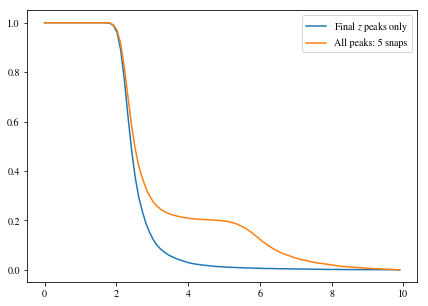

In [7]:
plt.figure(figsize = (7,5))
plt.plot(bins[:-1], F2, label="Final $z$ peaks only")
plt.plot(bins[:-1], F, label="All peaks: 5 snaps")
#plt.plot(bins[:-1], F3, label="All peaks: 100 snaps")

plt.legend()

In [8]:
redshifts = np.linspace(3402, 1e5, 100)
for z in redshifts:
    print(int(z), end = ' ')

3402 4377 5353 6329 7304 8280 9256 10232 11207 12183 13159 14135 15110 16086 17062 18038 19013 19989 20965 21941 22916 23892 24868 25843 26819 27795 28771 29746 30722 31698 32674 33649 34625 35601 36577 37552 38528 39504 40480 41455 42431 43407 44382 45358 46334 47310 48285 49261 50237 51213 52188 53164 54140 55116 56091 57067 58043 59019 59994 60970 61946 62921 63897 64873 65849 66824 67800 68776 69752 70727 71703 72679 73655 74630 75606 76582 77558 78533 79509 80485 81460 82436 83412 84388 85363 86339 87315 88291 89266 90242 91218 92194 93169 94145 95121 96097 97072 98048 99024 100000 

In [9]:
print(ppFile_more)

/usr/users/ellis/PeakPatch/m3p/axOut/../inputs/inputs.ax_manyz


In [10]:
l1 = len(all_peaks.T)
l2 = len(final_peaks.T)

In [11]:
print(l1, l2, l1/l2)

23127 18024 1.2831225033288949


In [12]:
print(all_peaks[:,0],"\n",all_peaks[:,0])

[1.1425781e-09 1.4876366e-07 3.7705075e-08 1.1778453e-09] 
 [1.1425781e-09 1.4876366e-07 3.7705075e-08 1.1778453e-09]


In [13]:
all_peaks[:,0]

array([1.1425781e-09, 1.4876366e-07, 3.7705075e-08, 1.1778453e-09],
      dtype=float32)